In [38]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
)

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [39]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
X.shape

(149, 4)

In [40]:
distinct_y = df.iloc[:, 4].unique()
distinct_y

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

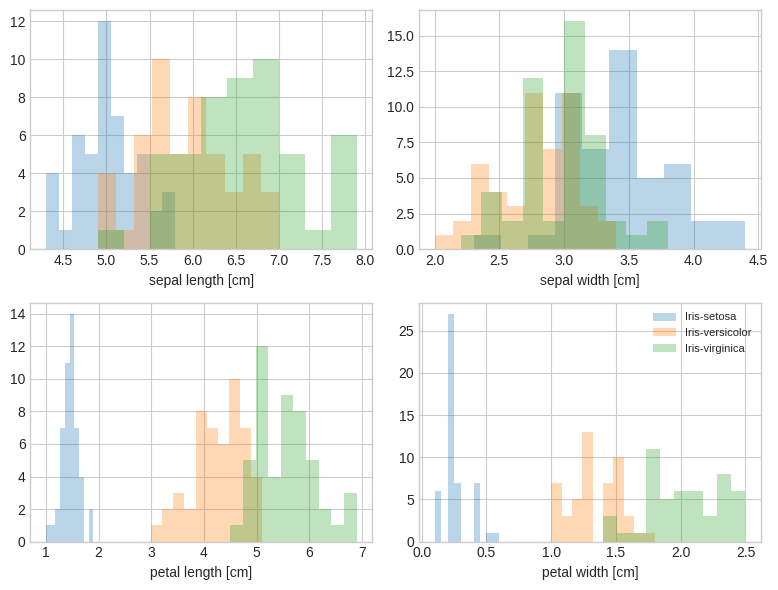

In [41]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301],
       [-1.2694489 ,  0.8077768 , -1.23992221, -1.32506301],
       [-1.2694489 , -0.11805969, -1.35396443, -1.45686167],
       [-1.87491588, -0.11805969, -1.52502777, -1.45686167],
       [-0.05851493,  2.19653152, -1.46800666, -1.32506301],
       [-0.17960833,  3.122368  , -1.29694332, -1.0614657 ],
       [-0.54288852,  1.9650724 , -1.41098555, -1.0614657 ],
       [-0.90616871,  1.

In [43]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [44]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalues 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [45]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52308496, -0.36956962,  0.72154279,  0.26301409],
       [ 0.25956935, -0.92681168, -0.2411952 , -0.12437342],
       [-0.58184289, -0.01912775, -0.13962963, -0.80099722],
       [-0.56609604, -0.06381646, -0.63380158,  0.52321917]])

In [46]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [47]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9244283691111117
0.9321523302535063
0.14946373489813355
0.020982592764270655


In [48]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

In [53]:
var_exp

[72.62003332692032, 23.147406858644146, 3.7115155645845292, 0.5210442498510169]

In [52]:
cum_var_exp

array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

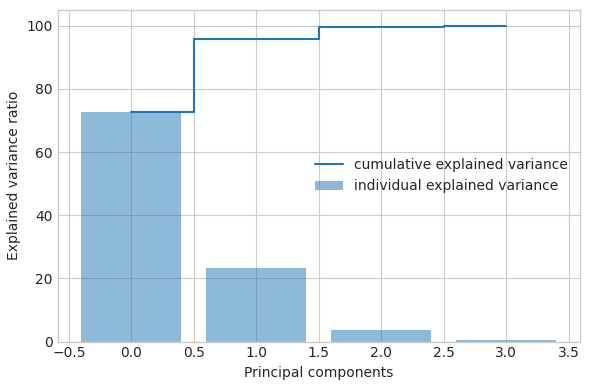

In [51]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [54]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [55]:
Y = X_std.dot(matrix_w)


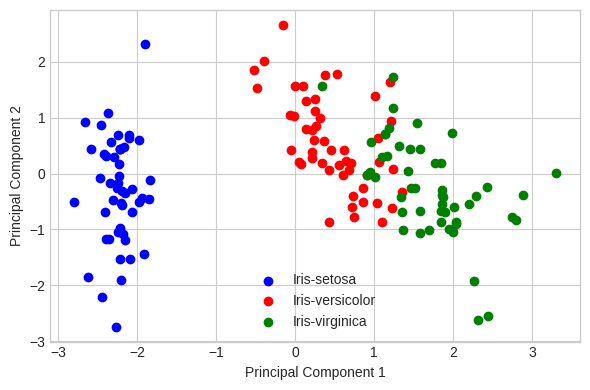

In [56]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()